# Deep Learning für Ingenieure WS25/26

**Programming tasks**

TODO: Add name, matrikelnummer and Studiengang, but don't push to git

## Task 1: Agricultural Sciences and Harvest

As an agricultural scientist, you want to develop a model that can predict the harvest yield of a specific field based on applied fertilizer (in kilograms per hectare) and the average precipitation during the growing season (in millimeters). Your research focuses on optimizing agricultural yields through predictive models.

**Problem statement**
* Load the file `harvest.csv`.
* Print the first 5 rows of the dataset to the command line.
* Write a Python program `p1_regression` that visualizes the data as follows. Use the libraries `pandas`, `numpy`, `matplotlib`, `mpl_toolkits.mplot3d`.
* Use `seaborn` to display the pairwise relationships between the following variables in `p1_regression`. Use the libraries `pandas`, `numpy`, `matplotlib`, `mpl_toolkits.mplot3d`.
* Randomize the dataset. Split the data in `p2_regression` into training and test data (80% training, 20% test). Create a model in Keras with 2 hidden layers, each with 4 nodes and ReLU activation. Use Mean Squared Error as the loss function, and the Adam optimizer. Train the model for 100 epochs, with a batch size of 50.
* Plot the loss curves for training and test.
* Plot the model and the data (separated by test and training data).
* Finally compute the model’s predicted values for the following input pairs: Precipitation/Fertilizer: [0.25, 0.25], [0.85, 0.75].

In [33]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf

### Load CSV and display first rows

In [34]:
# Load harvest.csv as a DataFrame
harvest_df = pd.read_csv('harvest.csv')

# Display the first five rows of the DataFrame
print(harvest_df.head(5))

     Dünger  Niederschlag    Ertrag
0  0.374540      0.950714  3.042819
1  0.731994      0.598658  3.259764
2  0.156019      0.155995  0.818065
3  0.058084      0.866176  1.967662
4  0.601115      0.708073  3.275469


### Visualize the data in a 3D-plot

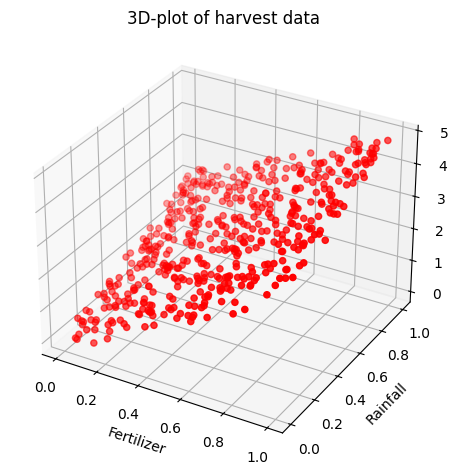

In [35]:
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(harvest_df['Dünger'], harvest_df['Niederschlag'], harvest_df['Ertrag'], c='r', marker='o')

# Options
ax.set_xlabel('Fertilizer')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Yield')

ax.set_title('3D-plot of harvest data')

plt.tight_layout()
plt.show()

### Show pair plots, using seaborn

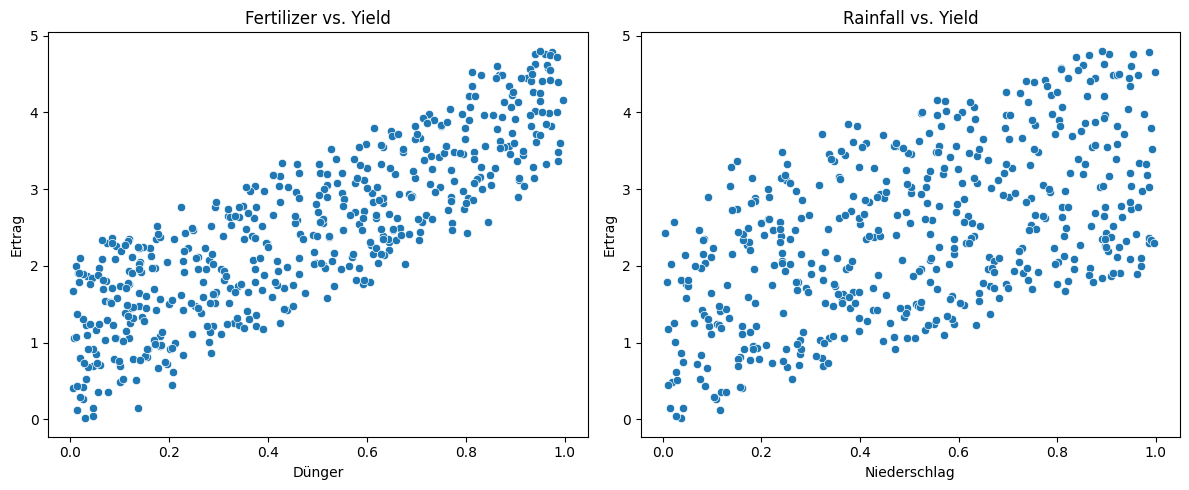

In [36]:
# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot
sns.scatterplot(data=harvest_df, x='Dünger', y='Ertrag', ax=axes[0])
sns.scatterplot(data=harvest_df, x='Niederschlag', y='Ertrag', ax=axes[1])

# Options
axes[0].set_title('Fertilizer vs. Yield')
axes[1].set_title('Rainfall vs. Yield')
plt.tight_layout()
plt.show()

### Randomising the dataset, creating training- and test-data

In [37]:
# Randomize dataset and split into training and test sets
train_dataset = harvest_df.sample(frac=0.8, random_state=0)
test_dataset = harvest_df.drop(train_dataset.index)

# Split features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Ertrag')
test_labels = test_features.pop('Ertrag')

# Display mean and standard deviation of training features
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Dünger,0.465685,0.296174
Niederschlag,0.512570,0.286376
Ertrag,2.436352,1.060531


### Creating and training the model

In [38]:
# Define a function to plot loss curves
def plot_loss(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Test Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()

**Note:**

In order for `summary()` to show the output shape and number of parameters, it was necassary to add an input layer, that defines the number of inputs.

This layer is not necassary for the training of the model itself.

In [39]:
# Define the model
harvest_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,)),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
harvest_model.compile(optimizer='adam', loss='mean_squared_error')
harvest_model.summary()

# Train the model with 100 epochs and a batch size of 50
history = harvest_model.fit(
    train_features,
    train_labels,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    verbose=1
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.2808 - val_loss: 6.6600
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.1743 - val_loss: 6.5633
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.0711 - val_loss: 6.4712
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.9732 - val_loss: 6.3842
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.8815 - val_loss: 6.3019
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7952 - val_loss: 6.2223
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7115 - val_loss: 6.1461
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6311 - val_loss: 6.0719
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5524 - val_loss: 5.9986
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4760 - val_loss: 5.9239
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.3962 - val_loss: 5.8483
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.3150 - val_lo

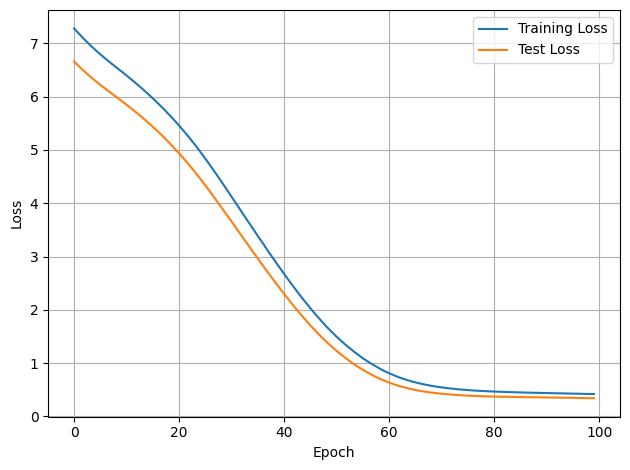

In [40]:
# Plot the loss curves
plot_loss(history)
plt.show()

### Plotting model and data (split by test- and training-data)

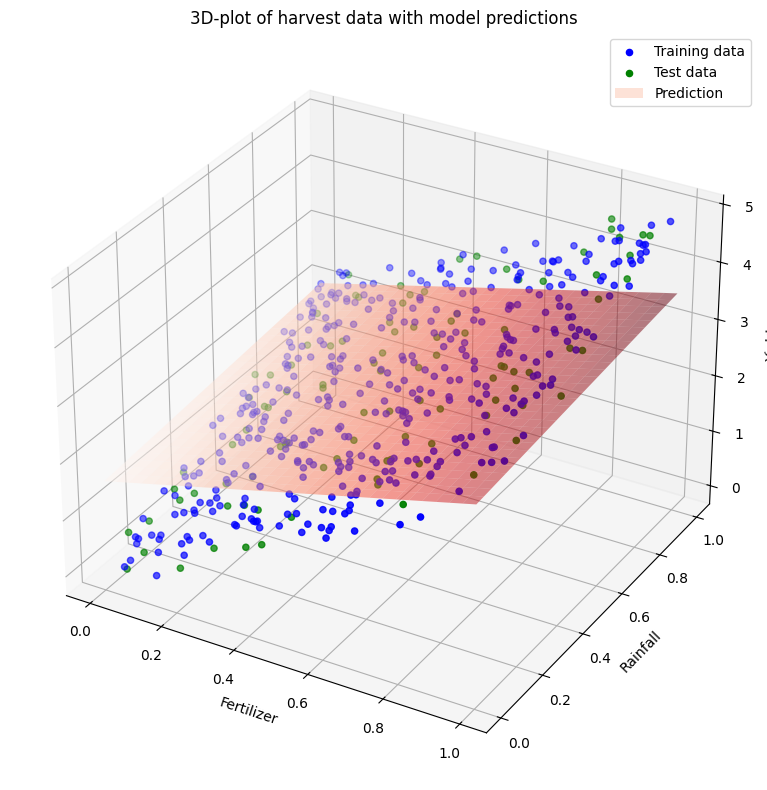

In [41]:
# Create 3d plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(train_dataset['Dünger'], train_dataset['Niederschlag'], train_dataset['Ertrag'], c='b', marker='o')
ax.scatter(test_dataset['Dünger'], test_dataset['Niederschlag'], test_dataset['Ertrag'], c='g', marker='o')

# MODEL PREDICTIONS: Create prediction surface/mesh
# Generate grid for predictions
fertilizer_range = np.linspace(train_dataset['Dünger'].min(), train_dataset['Dünger'].max(), 30)
rainfall_range = np.linspace(train_dataset['Niederschlag'].min(), train_dataset['Niederschlag'].max(), 30)
fertilizer_grid, rainfall_grid = np.meshgrid(fertilizer_range, rainfall_range)

# Reshape grid for model prediction (model expects 2D input: [samples, features])
grid_input = np.column_stack([fertilizer_grid.ravel(), rainfall_grid.ravel()])
grid_predictions = harvest_model.predict(grid_input, verbose=0).flatten()

# Reshape predictions back to grid shape
Z_pred = grid_predictions.reshape(fertilizer_grid.shape)

# Plot model prediction surface
ax.plot_surface(fertilizer_grid, rainfall_grid, Z_pred, alpha=0.5, cmap='Reds', linewidth=0)

# Options
ax.set_xlabel('Fertilizer')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Yield')
ax.set_title('3D-plot of harvest data with model predictions')


ax.legend(['Training data', 'Test data', 'Prediction'])
plt.tight_layout()
plt.show()

### Make predictions based on given value-pairs

In [42]:
# Define input value-pairs
input_1 = np.array([[0.25, 0.25]])
input_2 = np.array([[0.85, 0.75]])

# Make predictions
prediction_1 = harvest_model.predict(input_1, verbose=0)
prediction_2 = harvest_model.predict(input_2, verbose=0)

# Print results
print(f'Prediction for Fertilizer={input_1[0][0]}, Rainfall={input_1[0][1]}: Yield={prediction_1[0][0]:.4f}')
print(f'Prediction for Fertilizer={input_2[0][0]}, Rainfall={input_2[0][1]}: Yield={prediction_2[0][0]:.4f}')

Prediction for Fertilizer=0.25, Rainfall=0.25: Yield=2.0911
Prediction for Fertilizer=0.85, Rainfall=0.75: Yield=3.2404


## Task 2: Thin-billed Gulls and Bighorn Sheep

Distinguishing between thin-billed gulls and bighorn sheep presents an interesting and relevant challenge in biological research and nature conservation. These two species are not only ecologically significant but also fascinating in their behavior and habitats. The ability to differentiate between them is therefore essential for further professional development.

**Problem statement**
* Load the file `animals.csv`.
* Print the first 5 rows of the dataset to the command line.
* Write a Python program `p1_classification` that visualizes the data as follows. Use the libraries `pandas` and `matplotlib`.
* Randomize the dataset. Encode the labels as numeric values so they can be processed by TensorFlow. Split the data in `p2_classification` into training and test data (80% training, 20% test). Create a model in Keras with 2 hidden layers, each with 4 nodes and ReLU activation. The output node should use the sigmoid activation function. Use Binary Cross Entropy as the loss function and the Adam optimizer. Train the model for 50 (or more) epochs with a batch size of 100.
* Plot the loss function for training and test. How does the progression differ between few and many epochs?
* Plot the learned model and the test data using `matplotlib`’s `contourf` and `scatter`.
* Finally compute the model’s predicted values for the following input pairs: Circumference/Size: [90, 90], [70, 70].

In [43]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Load CSV and display first rows

In [44]:
# Load animals.csv as a DataFrame
animals_df = pd.read_csv('animals.csv')

# Display the first five rows of the DataFrame
print(animals_df.head(5))

      Groesse      Umfang               Label
0   94.981605  118.028572  Duennschnabelmoewe
1  109.279758  103.946339  Duennschnabelmoewe
2   86.240746   86.239781  Duennschnabelmoewe
3  104.044600  108.322903  Duennschnabelmoewe
4  113.297706   88.493564  Duennschnabelmoewe


### Visualize the data

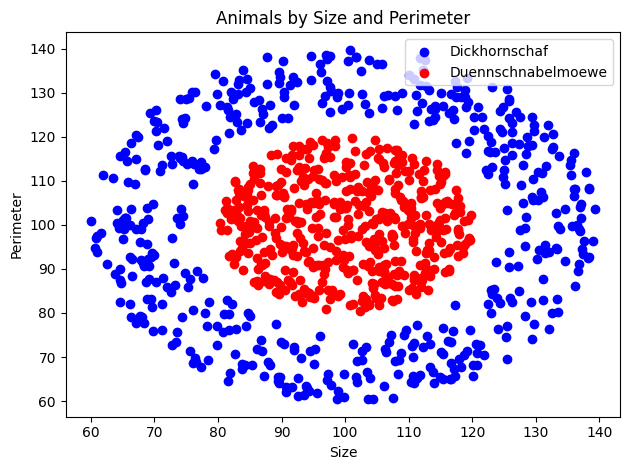

In [45]:
# Create figure
fig, ax = plt.subplots()

# Plot based on label
for label, group in animals_df.groupby('Label'):
    color = 'red' if label == 'Duennschnabelmoewe' else 'blue'
    ax.scatter(group['Groesse'], group['Umfang'], c=color, label=label)

ax.set_xlabel('Size')
ax.set_ylabel('Perimeter')
ax.set_title('Animals by Size and Perimeter')
ax.legend(loc='best')

plt.tight_layout()
plt.show()

### Randomising the dataset, convert labels to numerical values and creating training- and test-data

In [46]:
# Converting labels to numerical values
# animals_df = pd.get_dummies(animals_df, columns=['Label'], prefix='', prefix_sep='')
animals_df['Label'] = animals_df['Label'].map({'Duennschnabelmoewe': 0, 'Dickhornschaf': 1})

# Display the first five rows of the modified DataFrame
print(animals_df.head(5))

      Groesse      Umfang  Label
0   94.981605  118.028572      0
1  109.279758  103.946339      0
2   86.240746   86.239781      0
3  104.044600  108.322903      0
4  113.297706   88.493564      0


In [47]:
# Randomize dataset and split into training and test sets
train_dataset = animals_df.sample(frac=0.8, random_state=0)
test_dataset = animals_df.drop(train_dataset.index)

# Split features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Label')
test_labels = test_features.pop('Label')

# Display mean and standard deviation of training features
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Groesse,100.147497,18.312853
Umfang,100.496178,18.170979
Label,0.501250,0.500311


### Creating and training the model(s)

In [48]:
# Define a function to plot loss curves
def plot_loss(history, ax=None):
  ax.plot(history.history['loss'], label='Training Loss')
  ax.plot(history.history['val_loss'], label='Test Loss')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.set_title('Model Loss')
  ax.legend()
  ax.grid(True)


**Note:** It was necassary to define a normalization layer here!

Without normalization the models were not able to learn properly.
The accuracy was ~50% regardless of the number of epochs. Adding more layers or nodes also did not improve training.
In the last plot for the decision boundaries the models always seemed to produce a linear decision boundary, but never a circle.

Only adding normalization was able to fix these problems.

In [49]:
# Define the model for shorter training
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

animal_model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,)),
    normalizer,
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
animal_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
animal_model_1.summary()

# Train the model
history_1 = animal_model_1.fit(
    train_features,
    train_labels,
    epochs=50,
    batch_size=100,
    validation_split=0.2,
    verbose=1
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (172.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 5 (24.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4625 - loss: 0.6938 - val_accuracy: 0.4812 - val_loss: 0.6894
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4781 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6878
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4766 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6863
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4750 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.6848
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4906 - loss: 0.6894 - val_accuracy: 0.5125 - val_loss: 0.6833
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4969 - loss: 0.6884 - val_accuracy: 0.5063 - val_loss: 0.6817
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5172 - loss: 0.6872 - val_accuracy: 0.5125 - val_loss: 0.6799
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5359 - loss: 0.6859 - val_accuracy: 0.5688 - val_loss: 0.6778


In [50]:
# Evaluate the model on the test set
test_loss_1, test_accuracy_1 = animal_model_1.evaluate(test_features, test_labels, verbose=2)
print(f'Test Loss (50 epochs): {test_loss_1:.4f}')
print(f'Test Accuracy (50 epochs): {test_accuracy_1:.4f}')

7/7 - 0s - 6ms/step - accuracy: 0.7300 - loss: 0.5777
Test Loss (50 epochs): 0.5777
Test Accuracy (50 epochs): 0.7300


In [51]:
# Define the model for longer training
animal_model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,)),
    normalizer,
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
animal_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
animal_model_2.summary()

# Train the model
history_2 = animal_model_2.fit(
    train_features,
    train_labels,
    epochs=200,
    batch_size=100,
    validation_split=0.2,
    verbose=1
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (172.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 5 (24.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5000 - loss: 0.6517 - val_accuracy: 0.5125 - val_loss: 0.6516
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5063 - loss: 0.6486 - val_accuracy: 0.5188 - val_loss: 0.6488
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5141 - loss: 0.6455 - val_accuracy: 0.5312 - val_loss: 0.6460
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5281 - loss: 0.6424 - val_accuracy: 0.5375 - val_loss: 0.6431
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5422 - loss: 0.6392 - val_accuracy: 0.5500 - val_loss: 0.6400
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5656 - loss: 0.6358 - val_accuracy: 0.5562 - val_loss: 0.6367
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5813 - loss: 0.6324 - val_accuracy: 0.5562 - val_loss: 0.6333
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5906 - loss: 0.6289 - val_accuracy: 0.5875 - val_loss:

In [52]:
# Evaluate the model on the test set
test_loss_2, test_accuracy_2 = animal_model_2.evaluate(test_features, test_labels, verbose=2)
print(f'Test Loss (200 epochs): {test_loss_2:.4f}')
print(f'Test Accuracy (200 epochs): {test_accuracy_2:.4f}')

7/7 - 0s - 6ms/step - accuracy: 0.9950 - loss: 0.1443
Test Loss (200 epochs): 0.1443
Test Accuracy (200 epochs): 0.9950


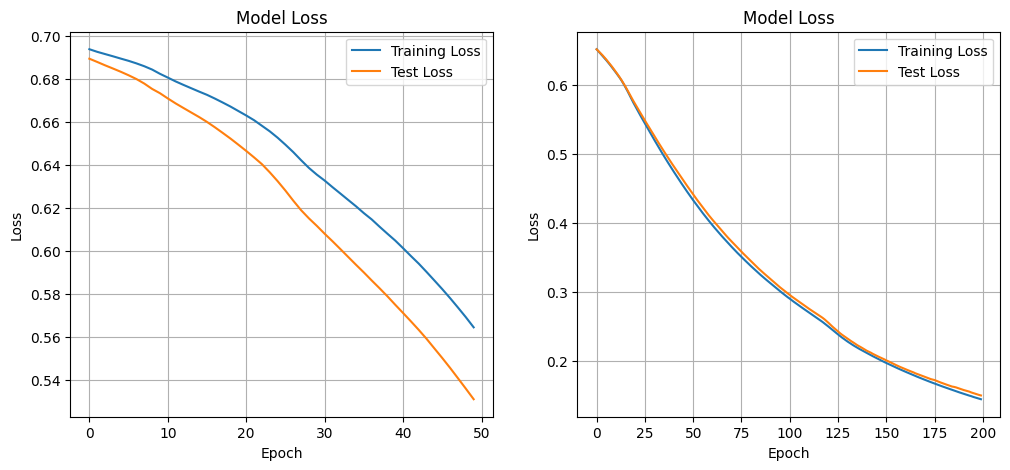

In [53]:
# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss curves
plot_loss(history_1, ax=axes[0])
plot_loss(history_2, ax=axes[1])
plt.show()

### Plotting the model and test data

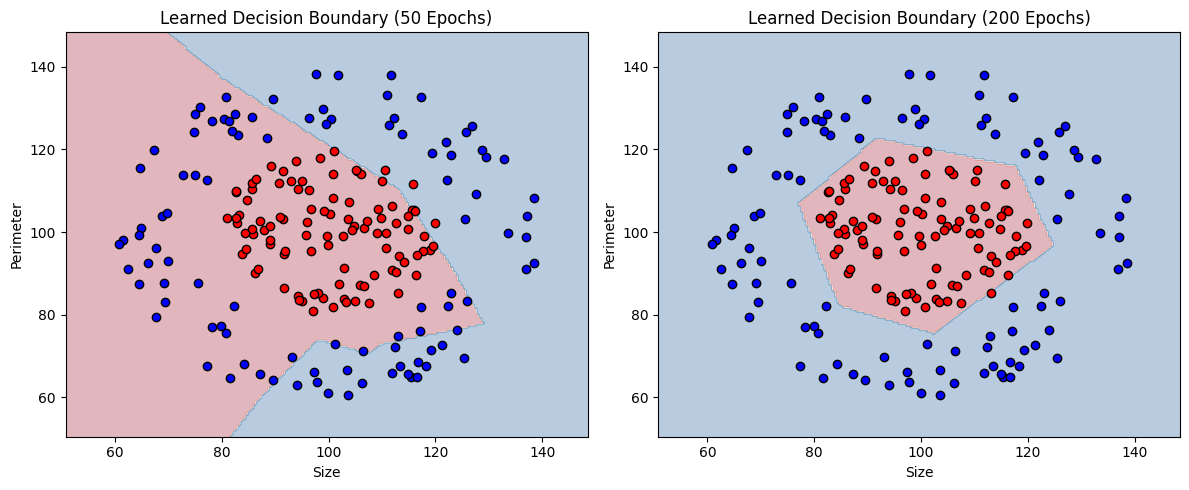

In [54]:
# Plotting model decision boundaries and test data points using contourf and scatter
def plot_decision_boundary(model, features, labels, ax, title):
    # Create a grid of points
    x_min, x_max = features['Groesse'].min() - 10, features['Groesse'].max() + 10
    y_min, y_max = features['Umfang'].min() - 10, features['Umfang'].max() + 10
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on the grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points, verbose=0)
    Z = (Z > 0.5).astype(int).ravel().reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

    # Plot test data points
    for label in np.unique(labels):
        idx = labels == label
        color = 'red' if label == 0 else 'blue'
        ax.scatter(features['Groesse'][idx], features['Umfang'][idx], c=color, edgecolor='k')

    ax.set_xlabel('Size')
    ax.set_ylabel('Perimeter')
    ax.set_title(title)

# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot decision boundaries
plot_decision_boundary(animal_model_1, test_features, test_labels, axes[0], 'Learned Decision Boundary (50 Epochs)')
plot_decision_boundary(animal_model_2, test_features, test_labels, axes[1], 'Learned Decision Boundary (200 Epochs)')
plt.tight_layout()
plt.show()

In [56]:
# Prediction based on given input values
input_1 = np.array([[90.0, 90.0]])
input_2 = np.array([[70.0, 70.0]])

prediction_1 = animal_model_2.predict(input_1, verbose=0)
prediction_2 = animal_model_2.predict(input_2, verbose=0)

print(f'Prediction for Input {input_1[0]}: {prediction_1[0][0]:.4f}, {'Dickhornschaf' if prediction_1[0][0]>=0.5 else 'Duennschnabelmoewe'}')
print(f'Prediction for Input {input_2[0]}: {prediction_2[0][0]:.4f}, {'Dickhornschaf' if prediction_2[0][0]>=0.5 else 'Duennschnabelmoewe'}')

Prediction for Input [90. 90.]: 0.2031, Duennschnabelmoewe
Prediction for Input [70. 70.]: 0.9994, Dickhornschaf
